# **Python Setup**
RUN THIS FIRST!

In [1]:
#@title # Python Setup { display-mode: "form" }

#@markdown <font color="red"> ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ </font>

#@markdown <font color="red"><h3><b><i> Begin by running this cell.</i></b></h3> </font>

#@markdown <font color="red"> ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ </font>

!pip install exifread &> /dev/null

import os, sys
if 'google.colab' in str(get_ipython()):
  print('Google Colab Environment - Loading Dependencies...')
  !rm -r ImageSTEM imageSTEAM &> /dev/null
  !git clone https://github.com/ImagingLyceum-ASU/ImageSTEAM.git &> /dev/null
  !mv ImageSTEAM/imageSTEAM ./
  !rm -r ImageSTEAM
else:
  print('Local iPython Environment')
  dir1 = os.path.dirname(os.path.abspath('../../'))
  if not dir1 in sys.path: sys.path.append(dir1)

import imageSTEAM as steam
from imageSTEAM import *
print('Environment Ready!')

Google Colab Environment - Loading Dependencies...
Environment Ready!


# **Introduction**

- How does a computer recognize an object?
- What is data?
- What is a neural network?

#  
<font color="red"> %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
</font>

# **Activity: Recognize a dog vs. a cat**

Let's build a machine to detect whether a picture is that of a dog or a cat. This is known as a classifier/classification problem.

## Import Packages


###Dependencies

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from google.colab import files

import os, random
import zipfile
from shutil import copyfile

###Functions

In [3]:
# Loads the images into the computer memory
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

# Displays an image, converts BGR to RGB
def display_img(a, title = "Original"):
    a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    plt.imshow(a), plt.title(title)
    plt.show()

# Displays an RGB image
def display_rgb_img(a, title = "Original"):
    plt.imshow(a), plt.title(title)
    plt.show()

# Resizes to the smallest image height
def resize_simple(im1, im2):
	if len(im1) > len(im2):
		im1 = cv2.resize(im1, (len(im2[0]), len(im2)))
	else:
		im2 = cv2.resize(im2, (len(im1[0]), len(im1)))
	return (im1, im2)

# Displays all of the images in a folder
def display_folder(dir):
  for filename in os.listdir(dir):
    temp_img = mpimg.imread(dir + '/' + filename)
    display_rgb_img(temp_img, filename)

def pick_random_image(dir):
  im_name = random.choice(os.listdir(dir))
  print(im_name)
  return cv2.imread(dir + im_name)

###Download Some Example Files

In [4]:
# Install

!wget --no-check-certificate \
    https://github.com/saesus/NSF_REU_Colab/blob/main/bin_img_class_dif/dog_pic.zip?raw=true \
    -O /tmp/dog_pic.zip

!wget --no-check-certificate \
    https://github.com/saesus/NSF_REU_Colab/blob/main/bin_img_class_dif/cat_pic.zip?raw=true \
    -O /tmp/cat_pic.zip

--2024-07-17 17:19:15--  https://github.com/saesus/NSF_REU_Colab/blob/main/bin_img_class_dif/dog_pic.zip?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/saesus/NSF_ITEST/blob/main/bin_img_class_dif/dog_pic.zip?raw=true [following]
--2024-07-17 17:19:15--  https://github.com/saesus/NSF_ITEST/blob/main/bin_img_class_dif/dog_pic.zip?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/saesus/NSF_ITEST/raw/main/bin_img_class_dif/dog_pic.zip [following]
--2024-07-17 17:19:15--  https://github.com/saesus/NSF_ITEST/raw/main/bin_img_class_dif/dog_pic.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/saesus/NSF_ITEST/main/bin_img_class_dif/dog_pic.zip 

**Extract Images**

In [5]:
local_zip = '/tmp/cat_pic.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')

local_zip = '/tmp/dog_pic.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')

zip_ref.close()

copyfile('/content/dog_pic/dog1.jpg', '/content/dog.jpg')
copyfile('/content/cat_pic/cat1.jpg', '/content/cat.jpg')

'/content/cat.jpg'

##<font color='red'>Load An Image</font>

Some Functions You'll need!

cv2.imread("<font color='red'>file name</font>") <br>
display_img(<font color='red'>image array</font>, "<font color='red'>display name</font>")

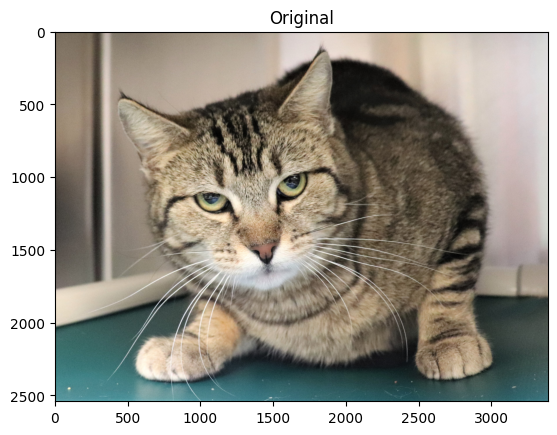

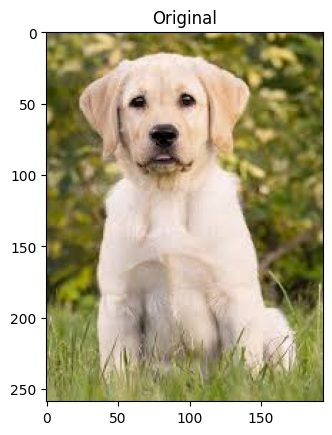

In [6]:
cat = cv2.imread('cat.jpg')
dog = cv2.imread('dog.jpg')

display_img(cat)
display_img(dog)

##<font color='red'>Edge Filters</font>

###Sobel Filters

I loaded in the two images for you! They're both saved as grayscale so that the processing is easier. The variable names are "cat" and "dog"

In [7]:
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)

Try filling in the arrays yourself!

In [8]:
sobel_x = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
               [ 0, 0, 0],
               [ 1, 2, 1]])

Let's see what results your arrays produced.

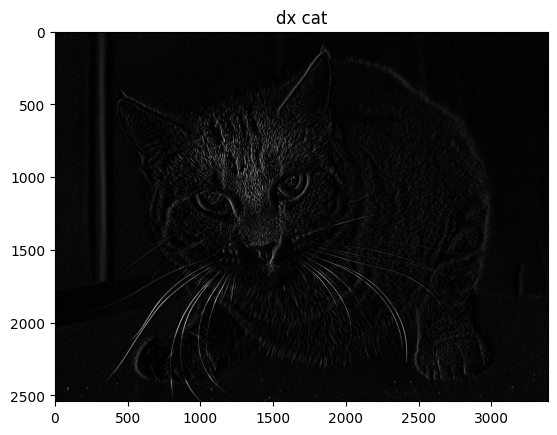

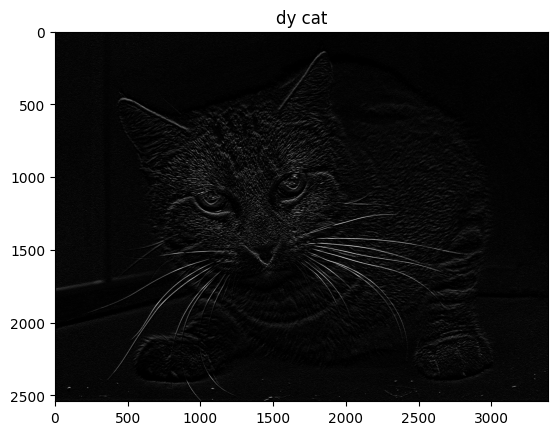

In [9]:
dx_cat = cv2.filter2D(cat, -1, sobel_x)
dy_cat = cv2.filter2D(cat, -1, sobel_y)

display_img(dx_cat, 'dx cat')
display_img(dy_cat, 'dy cat')

### Combining the Derivatives

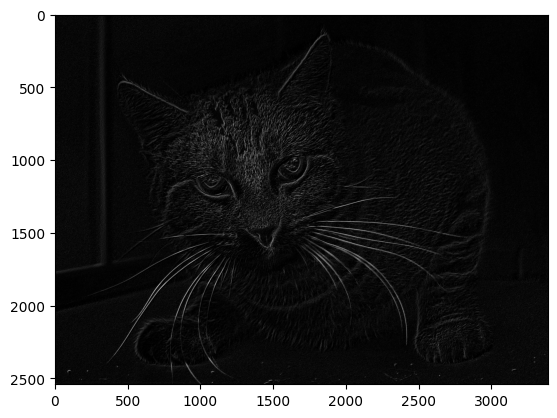

In [10]:
# Approximation of the gradient
g_cat = np.hypot(dx_cat, dy_cat) # same as sqrt(dx^2 + dy^2)
g_cat = g_cat / np.max(g_cat)
g_cat = (g_cat * 255).astype(np.uint8)
plt.imshow(g_cat, cmap='gray')

### Second Test

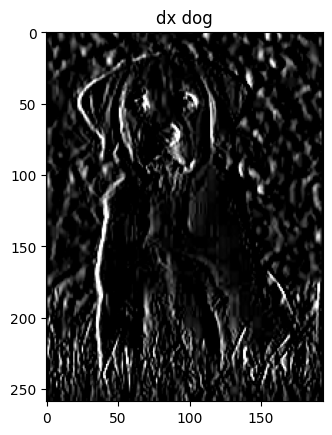

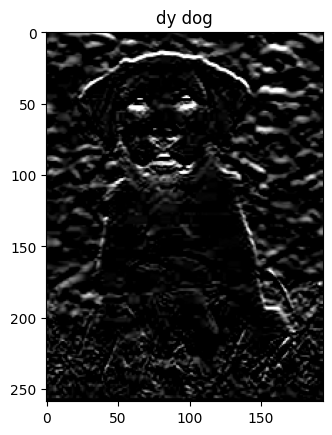

In [11]:
dx_dog = cv2.filter2D(dog, -1, sobel_x)
dy_dog = cv2.filter2D(dog, -1, sobel_y)

display_img(dx_dog, 'dx dog')
display_img(dy_dog, 'dy dog')

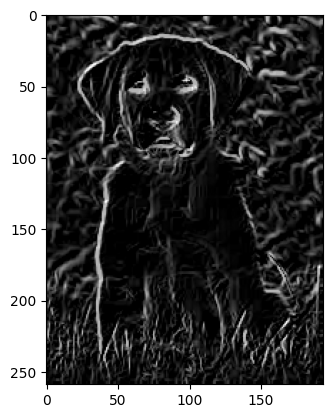

In [12]:
# Approximation of the gradient
g_dog = np.hypot(dx_dog, dy_dog) # same as sqrt(dx^2 + dy^2)
g_dog = g_dog / np.max(g_dog)
g_dog = (g_dog * 255).astype(np.uint8)
plt.imshow(g_dog, cmap='gray')

##Decision Making

Dot product with a random cat, then a random dog and the image processed above! <br>
Let's see if the new image is a cat or dog when compared to the images that you processed!

The dot product will give the cosine of the angle between the two images, so the larger one will be the classification!

In [13]:
def cos_similarity(a, b):
  return np.dot(a, b)

dog1.jpg


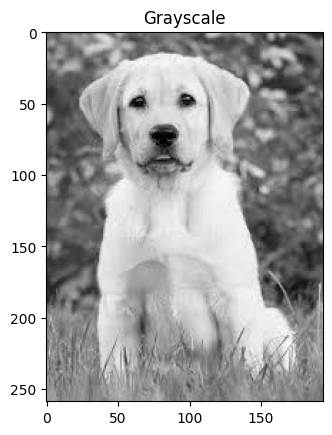

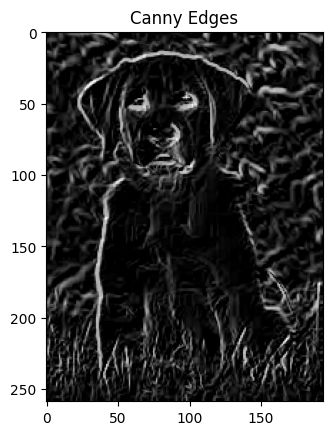

Random dog and dog1 dot product:  121
Random dog and cat1 dot product:  115
It might be a dog


In [14]:
compare_dog = pick_random_image('/content/dog_pic/')
compare_dog = cv2.cvtColor(compare_dog, cv2.COLOR_BGR2GRAY)
plt.imshow(compare_dog, cmap='gray'), plt.title('Grayscale')
plt.show()

# Canny Image of the New Image
dx_compare_dog = cv2.filter2D(compare_dog, -1, sobel_x)
dy_compare_dog = cv2.filter2D(compare_dog, -1, sobel_y)
g_compare_dog = np.hypot(dx_compare_dog, dy_compare_dog) # same as sqrt(dx^2 + dy^2)
g_compare_dog = g_compare_dog / np.max(g_compare_dog)
g_compare_dog = (g_compare_dog * 255).astype(np.uint8)
plt.imshow(g_compare_dog, cmap='gray'), plt.title('Canny Edges')
plt.show()

#Resize the images
g_dog, g_compare_dog = resize_simple(g_dog, g_compare_dog)
#Dot Product
dog_dog_dot = cos_similarity(g_dog.flatten(), g_compare_dog.flatten())
print("Random dog and dog1 dot product: ", dog_dog_dot)


g_cat, g_compare_dog = resize_simple(g_cat, g_compare_dog)
cat_dog_dot = cos_similarity(g_cat.flatten(), g_compare_dog.flatten())
print("Random dog and cat1 dot product: ", cat_dog_dot)

if (dog_dog_dot > cat_dog_dot):
  print("It might be a dog")
elif (dog_dog_dot == cat_dog_dot):
  print("It might be both a cat and a dog?")
else:
  print("It might be a cat")

cat3.jpg


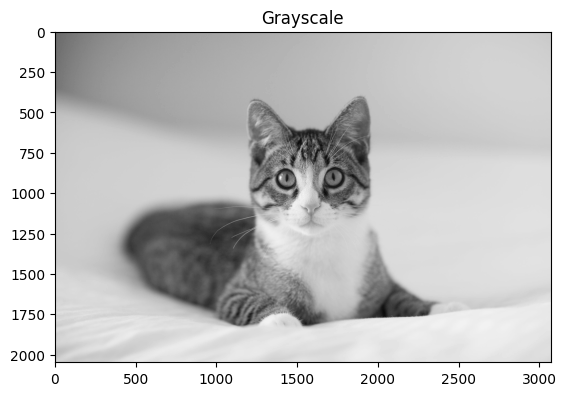

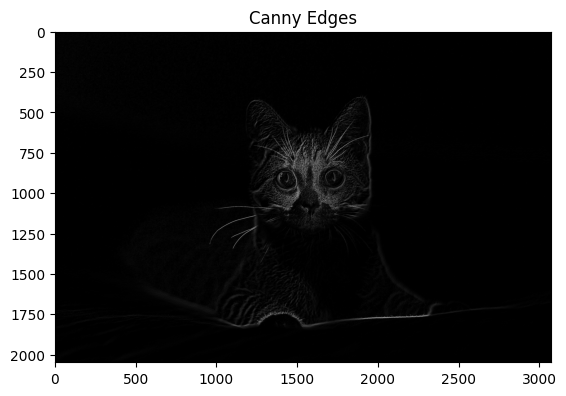

Random cat and dog1 dot product:  121
Random cat and cat1 dot product:  115
It might be a dog


In [15]:
compare_cat = pick_random_image('/content/cat_pic/')
compare_cat = cv2.cvtColor(compare_cat, cv2.COLOR_BGR2GRAY)
plt.imshow(compare_cat, cmap='gray'), plt.title('Grayscale')
plt.show()

# Canny Image of the New Image
dx_compare_cat = cv2.filter2D(compare_cat, -1, sobel_x)
dy_compare_cat = cv2.filter2D(compare_cat, -1, sobel_y)
g_compare_cat = np.hypot(dx_compare_cat, dy_compare_cat) # same as sqrt(dx^2 + dy^2)
g_compare_cat = g_compare_cat / np.max(g_compare_cat)
g_compare_cat = (g_compare_cat * 255).astype(np.uint8)
plt.imshow(g_compare_cat, cmap='gray'), plt.title('Canny Edges')
plt.show()

#Resize the images
g_dog, g_compare_cat = resize_simple(g_dog, g_compare_cat)
#Dot Product
dog_cat_dot = cos_similarity(g_dog.flatten(), g_compare_cat.flatten())
print("Random cat and dog1 dot product: ", dog_dog_dot)


g_cat, g_compare_cat = resize_simple(g_cat, g_compare_cat)
cat_cat_dot = cos_similarity(g_cat.flatten(), g_compare_cat.flatten())
print("Random cat and cat1 dot product: ", cat_dog_dot)

if (dog_dog_dot > cat_dog_dot):
  print("It might be a dog")
elif (dog_dog_dot == cat_dog_dot):
  print("It might be both a cat and a dog?")
else:
  print("It might be a cat")

# **CODA: Google Teachable Machine**

https://teachablemachine.withgoogle.com/


